# Verification 
Check that the MIS script produces valid results

In [1]:
# Imports
import datetime
from IPython.display import clear_output
import itertools
import json
import subprocess
import warnings

import matplotlib.pyplot as plt
import networkx as nx

After imports, we generate a network on which to operate. This network is written as an edgelist (the only format that MIS currently takes). Reading the edgelist back in to re-make `g` converts the node identifiers from `int` to `str`.

/Users/james/IdeaProjects/maximal_independent_set/.venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


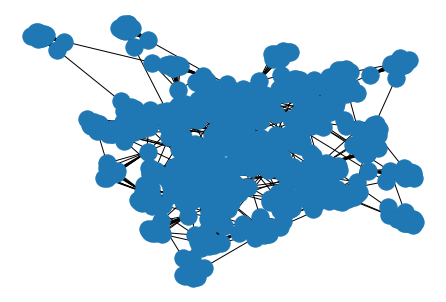

In [2]:
# Generate a network
infile = "test_edgelist.txt"
g = nx.generators.community.gaussian_random_partition_graph(
    1000,
    20,
    5,
    0.7,
    0.0002
)
nx.write_edgelist(g, infile)
g = nx.read_edgelist(infile)
with warnings.catch_warnings():
    nx.draw(g)
plt.show()

In [3]:
# This function uses a given i
def run(infile, side="max"):
    command = ["./target/release/mis",
        "-g", f"{infile}",
        "-n", "100000",
        "-t", "4",
        ]
    if side == "min":
        command += ["-s"]
    elif side == "max":
        pass
    else:
        raise Exception("Value for side must be 'max' or 'min'")
    
    result = json.loads(subprocess.check_output(command))
    return result
    

In [4]:
def verify(result):
    neighbors = {}
    for i in result["members"]:
        neighbors[i] = set(g.neighbors(i))
    
    # Check that no node in the result is a neighbor of an  existing node.
    for i,j in itertools.combinations(result["members"], 2):
        assert(i not in neighbors[j])
        assert(j not in neighbors[i])
    
    # Check that all nodes are either (1) in the result or (2) a neighbor.
    complete = set()
    for i, v in neighbors.items():
        complete.add(i)
        complete.update(v)
        
    assert(not complete.difference(g.nodes()))
    

In [5]:
smallest_best = {"size":999999, "members": []}
largest_best = {"size":0, "members": []}

counter = 0
t0 = datetime.datetime.now()

for _ in range(1):
    # Large
    result = run(infile)
    verify(result)
    # If the result size is larger, update.
    if result['size'] > largest_best["size"]:
        largest_best = result

    # Small
    result = run(infile, side="min")
    verify(result)
    # If the result size is smaller, update.
    if result['size'] < smallest_best["size"]:
        smallest_best = result
    
    counter += 100_000
    
    clear_output(wait=True)
    print(f"{datetime.datetime.now() - t0}: Counter @ {counter:,}")
    print()
    print(smallest_best)
    print()
    print(largest_best)

0:00:18.906050: Counter @ 100,000

{'size': 81, 'members': ['789', '511', '346', '741', '562', '764', '478', '81', '453', '183', '832', '285', '486', '911', '990', '178', '36', '845', '21', '102', '577', '360', '554', '751', '244', '717', '429', '700', '957', '531', '692', '600', '251', '897', '876', '684', '436', '217', '200', '304', '215', '391', '120', '777', '0', '390', '422', '282', '187', '898', '343', '170', '736', '321', '974', '483', '801', '363', '289', '909', '671', '750', '991', '381', '55', '916', '22', '873', '62', '626', '317', '906', '612', '530', '147', '35', '70', '937', '829', '646', '144']}

{'size': 111, 'members': ['345', '973', '528', '142', '513', '741', '702', '728', '5', '575', '279', '161', '135', '258', '14', '778', '611', '342', '300', '3', '550', '425', '999', '271', '998', '240', '804', '333', '220', '928', '909', '69', '622', '293', '355', '917', '880', '701', '934', '408', '902', '877', '487', '818', '437', '782', '844', '383', '366', '977', '23', '750'